#  Wrangle and Analyze Data - WeRateDogs

## Table of Contents
 - [Introdution](#intro)
 - [Gather](#gather)
     - [Enhanced Twittet Archive](#Twittet_Archive)
     - [Image prediction](#image)
     - [Tweet Stuatus Counts](#counts)
 - [Asses](#asses)
     - [Enhanced Twittet Archive](#Twittet_Archive_2)
     - [Image prediction](#image_2)
     - [Tweet Stuatus Counts](#counts_2)
 - [Clean](#clean)
 - [Exploratory Data Analysis](#explor)
 - [Conclusion](#conclusion)

<a id='intro'></a>
## Introdution

Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.



In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


%matplotlib inline
sns.set_style('white')

<a id='gather'></a>
## Gather

<a id='Twittet_Archive'></a>
### Enhanced Twitter Archive

Reading 'twitter-archive-enhanced.csv' file from pc.

In [2]:
twitter_archive_df = pd.read_csv('./data/twitter-archive-enhanced.csv')

<a id='image'></a>
### Image Predictions

Downloading 'image-predictions.tsv' from web.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response  = requests.get(url)
with open('./data/image-predictions.tsv', 'wb') as file:
    file.write(response.content)

Reading 'image-predictions.tsv' file from pc.

In [4]:
image_predictions_df = pd.read_csv('./data/image-predictions.tsv', '\t')

<a id='counts'></a>
### Tweet Stuatus Counts

Get the retweet count and favorite ("like") count and store in JSON data in a file called 'tweet_json.txt'

In [5]:
# consumer_key = 'xx'
# consumer_secret = 'xx'
# access_token = 'xx'
# access_secret = 'xx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

Divide the 'tweet_id' Series from 'twitter_archive_df' DataFrame into a list of lists, which internal list is of up to 100 items

In [6]:
tweet_ids_list = []
n_bunch = int(np.floor(len(twitter_archive_df.tweet_id)/100)) # number of internal lists
for i in range(n_bunch):
    tweet_ids = twitter_archive_df.tweet_id[i*100:i*100+99].values.tolist() # get the tweet_id for each of intems of the internal list (100)
    tweet_ids_list.append(tweet_ids)

# again to the last list (problaby 100 items or less)
n_bunch + 1
tweet_ids = twitter_archive_df.tweet_id[n_bunch*100:].tolist()
tweet_ids_list.append(tweet_ids)

Get the statuses for the tweets (up to 100 ids per request).

In [7]:
statuses_dict = {} # dictionary to save the statuses
for tweet_ids in tweet_ids_list:
    statuses = api.statuses_lookup(tweet_ids) # get up status for up to 100 ids
    for status in statuses:
        statuses_dict.update({status._json['id']:status._json}) # save each status to dictionary

Save the status in 'tweet_json.txt'

In [8]:
with open('./data/tweet_json.txt', 'w') as file:
    json.dump(statuses_dict, file, indent=1) 

Load the tweet_json.txt, get the 'retweet_count' and the 'favorite_count', and create a DataFrame named 'tweet_statuses_df'.

In [9]:
with open('./data/tweet_json.txt', 'r') as file:
    tweet_statuses = json.load(file)

In [10]:
statuses_dict = []
for tweet_id in tweet_statuses:
    
    statuses_dict.append({'tweet_id':tweet_id,
                          'favorite_count':tweet_statuses[tweet_id]['favorite_count'],
                          'retweet_count':tweet_statuses[tweet_id]['retweet_count']})
tweet_statuses_df = pd.DataFrame(statuses_dict)

<a id='asses'></a>
## Asses

Asses 'twitter_archive_df', 'image_predictions_df', and 'tweet_statuses_df' data frames

<a id='Twittet_Archive_2'></a>
### Enhanced Twittet Archive

In [11]:
twitter_archive_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
455,818307523543449600,NaN,NaN,2017-01-09 04:04:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Moose. He doesn't want his...,8.164506e+17,4.196984e+09,2017-01-04 01:05:59 +0000,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2215,668542336805281792,NaN,NaN,2015-11-22 21:31:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",There's a lot going on here but in my honest o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668542336...,10,10,None,None,None,None,None


In [12]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [14]:
twitter_archive_df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [15]:
twitter_archive_df.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [16]:
twitter_archive_df.query('tweet_id == 834786237630337024')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
317,834786237630337024,NaN,NaN,2017-02-23 15:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tobi. She is properly fetching her sho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834786237...,13,10,Tobi,None,None,None,None


Tweet 835246439529840640 is a comment on tweet 834786237630337024. The former should be dropped

In [17]:
twitter_archive_df.query('rating_denominator == 2')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


666287406224695296 is a 9/10

In [18]:
twitter_archive_df.query('rating_denominator == 7')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


810984652412424192 has no rate

In [19]:
twitter_archive_df.query('rating_denominator == 11')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


775096608509886464 doesn’t exist anymore,  740373189193256964 is a 14/10 682962037429899265 is a 10/10

In [20]:
twitter_archive_df.query('rating_denominator == 15')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None


832088576586297345 is not a dog

In [21]:
twitter_archive_df.query('rating_denominator == 16')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None


682808988178739200 has no rate

In [22]:
twitter_archive_df.query('rating_denominator == 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None


722974582966214656 is a 13/10 686035780142297088 is 12/10

In [23]:
twitter_archive_df.query('rating_denominator == 50')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


716439118184652801 is a 11/10

In [24]:
twitter_archive_df.query('10*rating_numerator/rating_denominator > 15')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


881633300179243008 drop

855862651834028034 drop

855860136149123072 drop

838150277551247360 drop

835246439529840640 drop

832215909146226688 drop

810984652412424192 no rate

786709082849828864 9.75/10

778027034220126208 11.27/10

749981277374128128 1776/10

680494726643068929 11.26/10

670842764863651840 not doggo

In [25]:
twitter_archive_df.tweet_id.duplicated().sum()

0

In [26]:
condition_1 = '((pupper != "None") and ((puppo != "None") or ((doggo != "None") or (floofer != "None"))))'
condition_2 = '((puppo != "None") and ((pupper != "None") or ((doggo != "None") or (floofer != "None"))))'
condition_3 = '((doggo != "None") and ((puppo != "None") or ((pupper != "None") or (floofer != "None"))))'
condition_4 = '((floofer != "None") and ((puppo != "None") or ((doggo != "None") or (pupper != "None"))))'
condition_sum = '({} or {}) or ({} or {})'.format(condition_1, condition_2, condition_3, condition_4)
twitter_archive_df.query(condition_sum)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


855851453814013952 is puppo 

854010172552949760 is floofer 

817777686764523521 is pupper

808106460588765185 is pupper, doggo

802265048156610565 is pupper, doggo

801115127852503040 is pupper 

785639753186217984 is not a doggo

781308096455073793 is pupper, doggo

775898661951791106 is pupper, doggo

770093767776997377 is pupper, doggo

759793422261743616 is pupper, doggo

751583847268179968 is doggo

741067306818797568 is pupper, doggo

733109485275860992 is pupper, doggo

<a id='image_2'></a>
### Image Predictions

In [27]:
image_predictions_df.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
557,677687604918272002,https://pbs.twimg.com/media/CWehRdEWIAAySyO.jpg,1,Pembroke,0.573047,True,sunglasses,0.126758,False,golden_retriever,0.108047,True
1643,808001312164028416,https://pbs.twimg.com/media/CzaY5UdUoAAC91S.jpg,1,Labrador_retriever,0.730959,True,Staffordshire_bullterrier,0.130726,True,American_Staffordshire_terrier,0.028853,True
370,672975131468300288,https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg,1,pug,0.836421,True,Brabancon_griffon,0.044668,True,French_bulldog,0.036570,True


In [28]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_predictions_df.tweet_id.duplicated().sum()

0

<a id='counts_2'></a>
### Tweet Stuatus Counts

In [30]:
tweet_statuses_df

,tweet_id,favorite_count,retweet_count
0,876484053909872640,17160,2085
1,886366144734445568,19210,2767
2,877611172832227328,0,71
3,888078434458587136,19841,3038
4,891689557279858688,38319,7548
...,...,...,...
2303,666099513787052032,139,57
2304,666268910803644416,93,32
2305,666362758909284353,691,495
2306,666835007768551424,194,71


In [31]:
tweet_statuses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2308 entries, 0 to 2307
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2308 non-null   object
 1   favorite_count  2308 non-null   int64 
 2   retweet_count   2308 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.2+ KB


In [32]:
tweet_statuses_df.tweet_id.duplicated().sum()

0

### Quality
#### Enhanced Twitter Archive table
- `timestamp` and `retweeted_status_timestamp` columns type are string, not datetime type.
- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, and `retweeted_status_user_id` are are of type float and should be of type string.
- Nulls represented by the string 'None' in 'name', `doggo`, `floofer`, `pupper`, and `puppo` columns.
- Strange rating_denominator values (ie. 0, 2, 7, 11, 15...). Same for rating_numerator.
- Unoriginal ratings (retweets).
- Unnecessary columns

#### Image Predictions table
- Missing information: `image_predictions_df` has 2075 rows and `twitter_archive_df` has 2356 rows ***(can't clean)***
- Same tweets are not dogs (according to the prediction).
- Unnecessary columns

#### Tweet Stuatus Counts table
- Missing information: `tweet_statuses_df` has 2308 rows and `twitter_archive_df` has 2356 rows ***(can't clean)***
- Inconsistent `tweet_id` column datatype

### Tidiness
- `pupper`, `puppo`, `doggo`, and `floofer` should be a single column of type category
- All tables forms a single observational unit. Therefore, they can be brought together as single data frame.

<a id='clean'></a>
## Clean

In [33]:
twitter_archive_clean_df = twitter_archive_df.copy()
image_predictions_clean_df = image_predictions_df.copy()
tweet_statuses_clean_df = tweet_statuses_df.copy()

#### - Unecessary columns

##### Define

Drop columns (`twitter_archive_clean_df`): `source`, `expanded_urls`, and `name`

Drop columns (`image_predictions_clean_df`): `jpg_url`, `img_num`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog`

##### Code

In [34]:
twitter_archive_clean_df.drop(columns=['source',
                                       'expanded_urls',
                                       'name'], inplace=True)
image_predictions_clean_df.drop(columns=['jpg_url',
                                         'img_num',
                                         'p1_conf',
                                         'p2',
                                         'p2_conf',
                                         'p2_dog',
                                         'p3',
                                         'p3_conf',
                                         'p3_dog'], inplace=True)

##### Test

In [35]:
twitter_archive_clean_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
1799,677187300187611136,NaN,NaN,2015-12-16 18:03:28 +0000,Here we see a Byzantine Rigatoni. Very aerodyn...,NaN,NaN,NaN,9,10,None,None,None,None
1062,741099773336379392,NaN,NaN,2016-06-10 02:48:49 +0000,This is Ted. He's given up. 11/10 relatable af...,NaN,NaN,NaN,11,10,None,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,14,10,doggo,None,None,None


In [36]:
image_predictions_clean_df.sample(3)

,tweet_id,p1,p1_dog
78,667443425659232256,goose,False
1167,735648611367784448,Pembroke,True
1624,803692223237865472,Lakeland_terrier,True


#### - Pupper, puppo, and doggo should be a single column of type category

##### Define

Create a new column of category 'pupper', 'puppo', 'floofer', or 'doggo'.

##### Code

In [37]:
twitter_archive_clean_df.loc[191,'doggo'] = 'None'
twitter_archive_clean_df.loc[200,'doggo'] = 'None'
twitter_archive_clean_df.loc[460,'doggo'] = 'None'
twitter_archive_clean_df.loc[575,'doggo'] = 'None'
twitter_archive_clean_df.loc[956,'pupper'] = 'None'

In [38]:
for index,row in twitter_archive_clean_df.iterrows():
    if row['doggo'] == 'doggo' and (row['pupper'] == 'None' and row['puppo'] == 'None' and row['floofer'] == 'None'):
        twitter_archive_clean_df.loc[index,'stage']='doggo'
    elif row['pupper'] == 'pupper' and (row['doggo'] == 'None' and row['puppo'] == 'None' and row['floofer'] == 'None'):
        twitter_archive_clean_df.loc[index,'stage']='pupper'
    elif row['puppo'] == 'puppo' and (row['pupper'] == 'None' and row['doggo'] == 'None' and row['floofer'] == 'None'):
        twitter_archive_clean_df.loc[index,'stage']='puppo'
    elif row['floofer'] == 'floofer' and (row['pupper'] == 'None' and row['puppo'] == 'None' and row['doggo'] == 'None'):
        twitter_archive_clean_df.loc[index,'stage']='floofer'
    elif not (row['doggo'] == 'None' and row['pupper'] == 'None' and row['puppo'] == 'None' and row['floofer'] == 'None'):
        twitter_archive_clean_df.loc[index,'stage']='multiple_stages'

In [39]:
twitter_archive_clean_df.stage = twitter_archive_clean_df.stage.astype('category')
twitter_archive_clean_df.drop(columns = ['pupper', 'puppo', 'doggo', 'floofer'], inplace=True)

##### Test

In [40]:
twitter_archive_clean_df.loc[[191,200,460,531,565,575,733,778,822,889,956,1063,1113],:]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,13,10,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,11,10,floofer
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,13,10,pupper
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,12,10,multiple_stages
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,11,10,multiple_stages
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,This is Bones. He's being haunted by another d...,NaN,NaN,NaN,12,10,pupper
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,12,10,multiple_stages
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,12,10,multiple_stages
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,12,10,multiple_stages
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,12,10,multiple_stages


In [41]:
twitter_archive_clean_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,stage
503,813066809284972545,NaN,NaN,2016-12-25 17:00:08 +0000,This is Tyr. He is disgusted by holiday traffi...,NaN,NaN,NaN,12,10,NaN
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,10,10,NaN
1370,702321140488925184,NaN,NaN,2016-02-24 02:36:23 +0000,Please enjoy this picture as much as I did. 12...,NaN,NaN,NaN,12,10,NaN


In [42]:
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   text                        2356 non-null   object  
 5   retweeted_status_id         181 non-null    float64 
 6   retweeted_status_user_id    181 non-null    float64 
 7   retweeted_status_timestamp  181 non-null    object  
 8   rating_numerator            2356 non-null   int64   
 9   rating_denominator          2356 non-null   int64   
 10  stage                       380 non-null    category
dtypes: category(1), float64(4), int64(3), object(3)
memory usage: 186.7+ KB


#### - Inconsistent tweet_id column datatype

##### Define

Change `tweet_id` column in `twitter_archive_clean_df` and `image_predictions_clean_df` table to string

##### Code

In [43]:
twitter_archive_clean_df.tweet_id = twitter_archive_clean_df.tweet_id.astype('str')
image_predictions_clean_df.tweet_id = image_predictions_clean_df.tweet_id.astype('str')

##### Test

In [44]:
twitter_archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   object  
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   text                        2356 non-null   object  
 5   retweeted_status_id         181 non-null    float64 
 6   retweeted_status_user_id    181 non-null    float64 
 7   retweeted_status_timestamp  181 non-null    object  
 8   rating_numerator            2356 non-null   int64   
 9   rating_denominator          2356 non-null   int64   
 10  stage                       380 non-null    category
dtypes: category(1), float64(4), int64(2), object(4)
memory usage: 186.7+ KB


In [45]:
image_predictions_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
 1   p1        2075 non-null   object
 2   p1_dog    2075 non-null   bool  
dtypes: bool(1), object(2)
memory usage: 34.6+ KB


#### - All tables form a single observational unit. Therefore, they can be brought together as a single data frame.

##### Define

Merge twitter_archive_clean_df, image_predictions_clean_df, tweet_statuses_clean_df tables

##### Code

In [46]:
twitter_archive_master_df = pd.merge(twitter_archive_clean_df, image_predictions_clean_df, on='tweet_id', how='left')

In [47]:
twitter_archive_master_df = pd.merge(twitter_archive_master_df, tweet_statuses_clean_df, on='tweet_id', how='left')

In [48]:
twitter_archive_master_df.favorite_count = twitter_archive_master_df.favorite_count.astype('Int64')
twitter_archive_master_df.retweet_count = twitter_archive_master_df.retweet_count.astype('Int64')

##### Test

In [49]:
twitter_archive_master_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,stage,p1,p1_dog,favorite_count,retweet_count
598,798686750113755136,NaN,NaN,2016-11-16 00:38:54 +0000,"RT @dog_rates: Say hello to Jack (pronounced ""...",6.833919e+17,4.196984e+09,2016-01-02 20:58:09 +0000,11,10,NaN,NaN,NaN,0,2291
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,14,10,pupper,Irish_setter,True,0,71
1665,682750546109968385,NaN,NaN,2016-01-01 02:29:49 +0000,Meet Taco. He's a speckled Garnier Fructis. Lo...,NaN,NaN,NaN,9,10,NaN,English_setter,True,1458,418


#### -Unoriginal ratings (retweets).

##### Define
Drop all rows with retweets (`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, or `in_reply_to_user_id` is not NaN or blanck), then dro the columns

##### Code

In [50]:
condition_1 = '~((retweeted_status_id == "") or (retweeted_status_id != retweeted_status_id))'
condition_2 = '~((retweeted_status_user_id == "") or (retweeted_status_user_id != retweeted_status_user_id))'
condition_3 = '~((retweeted_status_timestamp == "") or (retweeted_status_timestamp != retweeted_status_timestamp))'
condition_sum_1 = '((({}) or ({})) or ({}))'.format(condition_1, condition_2, condition_3)
index = twitter_archive_master_df.query(condition_sum_1).index.values
twitter_archive_master_df.drop(index=index, inplace=True)

In [51]:
condition_1 = '~((in_reply_to_status_id == "") or (in_reply_to_status_id != in_reply_to_status_id))'
condition_2 = '~((in_reply_to_user_id == "") or (in_reply_to_user_id != in_reply_to_user_id))'
condition_sum_2 = '({}) or ({})'.format(condition_1, condition_2)
index = twitter_archive_master_df.query(condition_sum_2).index.values
twitter_archive_master_df.drop(index=index, inplace=True)

##### Test

In [52]:
twitter_archive_master_df.query(condition_sum_1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,stage,p1,p1_dog,favorite_count,retweet_count


In [53]:
twitter_archive_master_df.query(condition_sum_1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,stage,p1,p1_dog,favorite_count,retweet_count


##### Code

In [54]:
twitter_archive_master_df.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

##### Test

In [55]:
twitter_archive_master_df.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,stage,p1,p1_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,orange,False,35044,7370
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,NaN,Chihuahua,True,30347,5493
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,Chihuahua,True,22811,3631


#### - Same tweets are not dogs (according to the prediction).

##### Define

Drop all rows with `p1_dog` equal to False

##### Code

In [56]:
index = twitter_archive_master_df[twitter_archive_master_df.p1_dog == False].index.values
twitter_archive_master_df.drop(index=index, inplace=True)

##### Test

In [57]:
twitter_archive_master_df[twitter_archive_master_df.p1_dog == False]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,stage,p1,p1_dog,favorite_count,retweet_count


##### Code

In [58]:
twitter_archive_master_df.drop(columns='p1_dog', inplace=True)

##### Test

In [59]:
twitter_archive_master_df.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,stage,p1,favorite_count,retweet_count
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,NaN,Chihuahua,30347,5493
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,Chihuahua,22811,3631
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,NaN,basset,36588,8136


#### - 'timestamp' and 'retweeted_status_timestamp' columns type are string, not datetime type.

##### Define
Change `timestamp` column data type from string to DateTime

##### Code

In [60]:
twitter_archive_master_df.timestamp = pd.to_datetime(twitter_archive_master_df.timestamp)
# twitter_archive_master_df.retweeted_status_timestamp = pd.to_datetime(twitter_archive_master_df.retweeted_status_timestamp)

##### Test

In [61]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 1 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1589 non-null   object             
 1   timestamp           1589 non-null   datetime64[ns, UTC]
 2   text                1589 non-null   object             
 3   rating_numerator    1589 non-null   int64              
 4   rating_denominator  1589 non-null   int64              
 5   stage               260 non-null    category           
 6   p1                  1463 non-null   object             
 7   favorite_count      1564 non-null   Int64              
 8   retweet_count       1564 non-null   Int64              
dtypes: Int64(2), category(1), datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 116.6+ KB


#### - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id are are of type float and should be of type string or int

##### Define

Change the datatype of these columns to string

##### Code

In [62]:
# twitter_archive_master_df.in_reply_to_status_id = twitter_archive_master_df.in_reply_to_status_id.astype('str')
# twitter_archive_master_df.in_reply_to_user_id = twitter_archive_master_df.in_reply_to_user_id.astype('str')
# twitter_archive_master_df.retweeted_status_id = twitter_archive_master_df.retweeted_status_id.astype('str')
# twitter_archive_master_df.retweeted_status_user_id = twitter_archive_master_df.retweeted_status_user_id.astype('str')

In [63]:
# twitter_archive_master_df.in_reply_to_status_id.replace('nan','', inplace=True)
# twitter_archive_master_df.in_reply_to_user_id.replace('nan','', inplace=True)
# twitter_archive_master_df.retweeted_status_id.replace('nan','', inplace=True)
# twitter_archive_master_df.retweeted_status_user_id.replace('nan','', inplace=True)

##### Test

In [64]:
# twitter_archive_master_df.info()

#### - Nulls represented by the string 'None' in 'name', 'doggo', 'pupper', and 'puppo' columns.

##### Define

- Replace 'None' by NaN in theses columns

##### Code

In [65]:
# twitter_archive_master_df.name.replace('None', np.NaN, inplace = True)
# twitter_archive_master_df.doggo.replace('None', np.NaN, inplace = True)
# twitter_archive_master_df.pupper.replace('None', np.NaN, inplace = True)
# twitter_archive_master_df.puppo.replace('None', np.NaN, inplace = True)

##### Test

In [66]:
# twitter_archive_master_df.sample(3)

#### Strange rating_denominator values (ie. 0, 2, 7, 11, 15...). Same for rating_numerator.

##### Define

Replace the values for the right ones

##### Code

In [67]:
# change columns to Int64 to support NaNs
# twitter_archive_master_df.rating_numerator = twitter_archive_master_df.rating_numerator.astype('Int64')
# twitter_archive_master_df.rating_denominator = twitter_archive_master_df.rating_denominator.astype('Int64')

# twitter_archive_master_df.drop(index=313,inplace=True)

twitter_archive_master_df.loc[2335,'rating_numerator'] = 9
twitter_archive_master_df.loc[2335,'rating_denominator'] = 10

twitter_archive_master_df.loc[516,'rating_numerator'] = np.nan
twitter_archive_master_df.loc[516,'rating_denominator'] = np.nan

twitter_archive_master_df.loc[784,'rating_numerator'] = np.nan
twitter_archive_master_df.loc[784,'rating_denominator'] = np.nan

twitter_archive_master_df.loc[1068,'rating_numerator'] = 14
twitter_archive_master_df.loc[1068,'rating_denominator'] = 10

twitter_archive_master_df.loc[1662,'rating_numerator'] = 10
twitter_archive_master_df.loc[1662,'rating_denominator'] = 10

# twitter_archive_master_df.drop(index=342, inplace=True)

twitter_archive_master_df.loc[1663,'rating_numerator'] = np.nan
twitter_archive_master_df.loc[1663,'rating_denominator'] = np.nan

twitter_archive_master_df.loc[1165,'rating_numerator'] = 13
twitter_archive_master_df.loc[1165,'rating_denominator'] = 10

twitter_archive_master_df.loc[1598,'rating_numerator'] = 12
twitter_archive_master_df.loc[1598,'rating_denominator'] = 10

twitter_archive_master_df.loc[1202,'rating_numerator'] = 11
twitter_archive_master_df.loc[1202,'rating_denominator'] = 10

twitter_archive_master_df.loc[695,'rating_numerator'] = 9.75

twitter_archive_master_df.loc[763,'rating_numerator'] = 11.27

twitter_archive_master_df.loc[1712,'rating_numerator'] = 11.26

##### Test

In [68]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593 entries, 1 to 1598
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1589 non-null   object             
 1   timestamp           1589 non-null   datetime64[ns, UTC]
 2   text                1589 non-null   object             
 3   rating_numerator    1590 non-null   float64            
 4   rating_denominator  1590 non-null   float64            
 5   stage               260 non-null    category           
 6   p1                  1463 non-null   object             
 7   favorite_count      1564 non-null   Int64              
 8   retweet_count       1564 non-null   Int64              
dtypes: Int64(2), category(1), datetime64[ns, UTC](1), float64(2), object(3)
memory usage: 196.9+ KB


In [69]:
twitter_archive_master_df.loc[[2335,516,784,1068,1662,1663,1165,1598,1202],:]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,stage,p1,favorite_count,retweet_count
2335,666287406224695296,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian...,9.0,10.0,NaN,Maltese_dog,131,57
516,810984652412424192,2016-12-19 23:06:23+00:00,Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,golden_retriever,5233,1400
784,NaN,NaT,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
1068,740373189193256964,2016-06-08 02:41:38+00:00,"After so many requests, this is Bretagne. She ...",14.0,10.0,NaN,golden_retriever,33751,12732
1662,NaN,NaT,NaN,10.0,10.0,NaN,NaN,<NA>,<NA>
1663,NaN,NaT,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
1165,722974582966214656,2016-04-21 02:25:47+00:00,Happy 4/20 from the squad! 13/10 for all https...,13.0,10.0,NaN,Great_Dane,3929,1494
1598,NaN,NaT,NaN,12.0,10.0,NaN,NaN,<NA>,<NA>
1202,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #Final...,11.0,10.0,NaN,Siberian_husky,2291,200


In [70]:
twitter_archive_master_df.query('10*rating_numerator/rating_denominator > 15')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,stage,p1,favorite_count,retweet_count


<a id='explor'></a>
## Exploratory Data Analysis

Convert the ratings to the same base 10 for easy comparison.

In [71]:
twitter_archive_master_df['rating_base_10'] = (10*twitter_archive_master_df.rating_numerator/twitter_archive_master_df.rating_denominator)
twitter_archive_master_df.drop(columns=['rating_numerator','rating_denominator'],inplace=True)
twitter_archive_master_df.head(3)

,tweet_id,timestamp,text,stage,p1,favorite_count,retweet_count,rating_base_10
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,Chihuahua,30347,5493,13.0
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,Chihuahua,22811,3631,12.0
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,basset,36588,8136,12.0


Check numeric data

In [72]:
twitter_archive_master_df.describe()

,favorite_count,retweet_count,rating_base_10
count,1564.000000,1564.000000,1590.000000
mean,8370.331841,2437.575448,10.971245
std,12049.012727,4323.223271,1.682731
min,69.000000,11.000000,2.000000
25%,1980.000000,564.750000,10.000000
50%,3986.500000,1246.000000,11.000000
75%,10416.250000,2771.000000,12.000000
max,150691.000000,74377.000000,14.000000


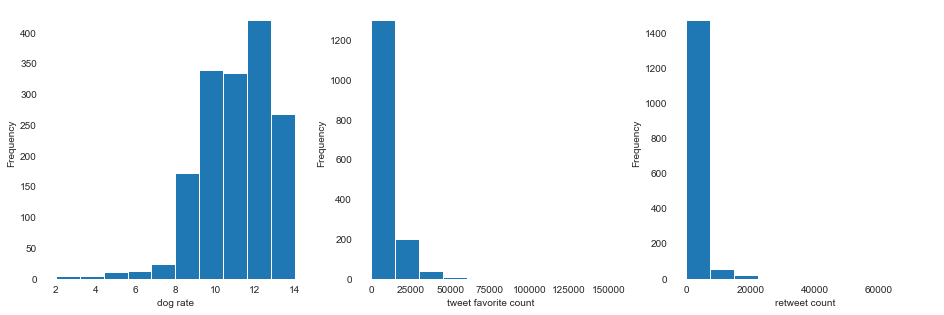

In [73]:
fig, axs = plt.subplots(ncols=3,figsize=(16,5))
twitter_archive_master_df.rating_base_10.plot(kind='hist', ax=axs[0]);
twitter_archive_master_df.favorite_count.plot(kind='hist', ax=axs[1]);
twitter_archive_master_df.retweet_count.plot(kind='hist', ax=axs[2]);
axs[0].set(xlabel='dog rate');
axs[1].set(xlabel='tweet favorite count');
axs[2].set(xlabel='retweet count');
sns.despine(left=True, bottom=True)

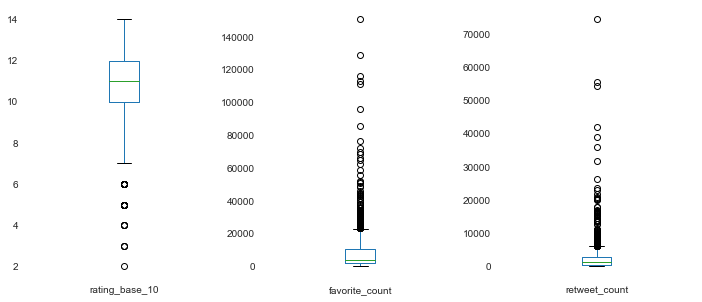

In [74]:
fig, axs = plt.subplots(ncols=3,figsize=(12,5))
twitter_archive_master_df.rating_base_10.plot(kind='box', ax=axs[0], xlabel='dog rate');
twitter_archive_master_df.favorite_count.plot(kind='box', ax=axs[1], xlabel='tweet favorite count');
twitter_archive_master_df.retweet_count.plot(kind='box', ax=axs[2], xlabel='retweet count');
sns.despine(left=True, bottom=True)

The data is very dispersed, the range is quite big and the outliers are many. `favorite_count` and `retweet_count` are very skewed to the right: some tweets are very popular, but most don't.

Let's see the correlation of `favorite_count` and `retweet_count` with 'dog rate'

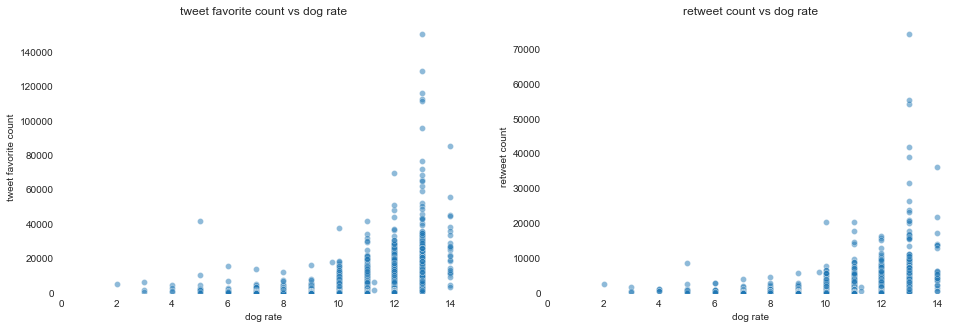

In [75]:
fig, axs = plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(data=twitter_archive_master_df, x='rating_base_10',y='favorite_count', alpha=.5, ax=axs[0]);
sns.scatterplot(data=twitter_archive_master_df, x='rating_base_10',y='retweet_count', alpha=.5, ax=axs[1]);
axs[0].set(xlabel='dog rate',ylabel='tweet favorite count', title='tweet favorite count vs dog rate', xlim=(0,None), ylim=(0,None));
axs[1].set(xlabel='dog rate',ylabel='retweet count', title='retweet count vs dog rate', xlim=(0,None), ylim=(0,None));
sns.despine(left=True, bottom=True)

We can clearly observe that the dog rates that exceed the limit of 10 are the most favourited and retweeted. However, if it is because of the cuteness of the dog or the uniqueness of the rating scheme is yet to be discovered. The tweet favourite and retweet counts look very similar, maybe correlated.

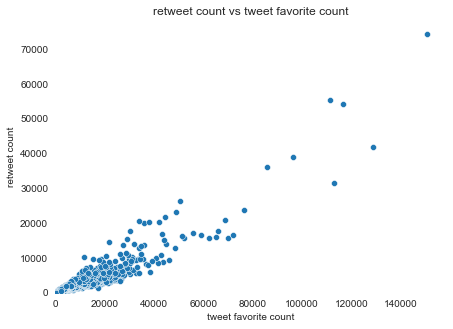

In [76]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(data=twitter_archive_master_df, x='favorite_count', y='retweet_count')
ax.set(xlabel='tweet favorite count', ylabel='retweet count', title='retweet count vs tweet favorite count', xlim=(0,None), ylim=(0,None));
sns.despine(left=True, bottom=True)

The tweet favorite and retweet counts are very correlated. Yet, It is less than I expected.

Let's see the evolution (inflation) on the dog rates.

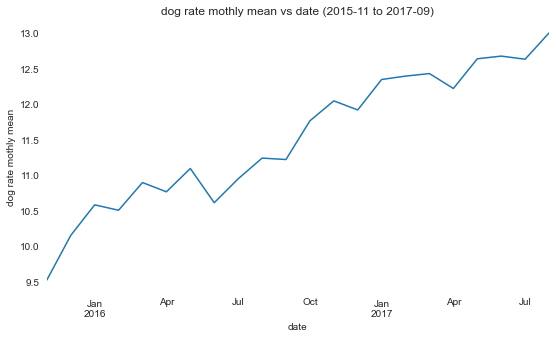

In [77]:
Series = twitter_archive_master_df.groupby(pd.Grouper(key='timestamp' ,freq='M'))['rating_base_10'].mean()
Series.plot(xlabel='date',ylabel='dog rate mothly mean', title='dog rate mothly mean vs date (2015-11 to 2017-09)', figsize=(9,5));
sns.despine(left=True, bottom=True)

Over time the ratings had growth.

Now, the evoluation of the popularity of the tweets.

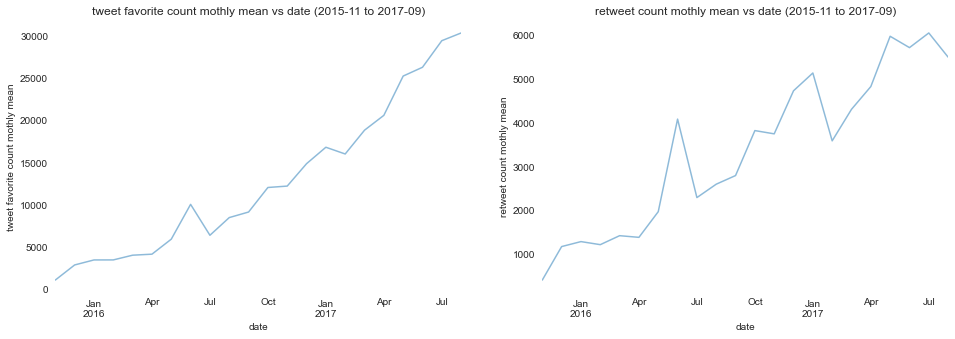

In [78]:
fib, axs = plt.subplots(ncols=2,figsize=(16,5))

Series = twitter_archive_master_df.groupby(pd.Grouper(key='timestamp' ,freq='M'))['favorite_count'].mean()
Series.plot(xlabel='date',ylabel='tweet favorite count mothly mean', title='tweet favorite count mothly mean vs date (2015-11 to 2017-09)', alpha=.5, ax=axs[0]);

Series = twitter_archive_master_df.groupby(pd.Grouper(key='timestamp' ,freq='M'))['retweet_count'].mean()
Series.plot(xlabel='date',ylabel='retweet count mothly mean', title='retweet count mothly mean vs date (2015-11 to 2017-09)', alpha=.5, ax=axs[1]);

sns.despine(left=True, bottom=True)

The tweet favorite count increased faster after 2016-7. Same point where the rates below 10 stoped.

Let's see the most and less common dog breeds

In [79]:
twitter_archive_master_df.p1.value_counts().head(10)

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: p1, dtype: int64

In [80]:
twitter_archive_master_df.p1.value_counts().tail(10)

toy_terrier           2
giant_schnauzer       2
Sussex_spaniel        2
standard_schnauzer    1
groenendael           1
clumber               1
Japanese_spaniel      1
EntleBucher           1
Scotch_terrier        1
silky_terrier         1
Name: p1, dtype: int64

Now, the most favourite breeds

In [81]:
df_mean = twitter_archive_master_df.groupby('p1')[['rating_base_10','favorite_count','retweet_count']].mean() # get the mean of favorite_count and retweet_count for each breed
df_mean.sort_values('rating_base_10',ascending=False).head(10) #sort the top 10, on rating

,rating_base_10,favorite_count,retweet_count
p1,,,
Saluki,12.500000,21556.750000,4328.750000
briard,12.333333,8388.666667,2490.333333
Tibetan_mastiff,12.250000,10701.000000,3504.000000
Border_terrier,12.142857,12098.571429,2859.571429
silky_terrier,12.000000,6456.000000,1571.000000
standard_schnauzer,12.000000,1770.000000,763.000000
Eskimo_dog,11.777778,13108.444444,4626.666667
Irish_setter,11.750000,9329.500000,2834.750000
Gordon_setter,11.750000,4835.000000,2099.750000


In [82]:
df_mean.sort_values('favorite_count',ascending=False).head(10) #sort the top 10 on favorite_count

,rating_base_10,favorite_count,retweet_count
p1,,,
Saluki,12.500000,21556.750000,4328.750000
French_bulldog,11.269231,16944.400000,4111.160000
Afghan_hound,9.666667,15268.000000,5004.333333
giant_schnauzer,11.500000,15251.500000,4312.500000
flat-coated_retriever,10.875000,15039.000000,3882.750000
Irish_water_spaniel,11.333333,14501.333333,3792.333333
standard_poodle,10.285714,14119.285714,5660.857143
English_springer,11.111111,13942.777778,5088.000000
Cardigan,11.529412,13544.764706,3810.352941


In [83]:
df_median = twitter_archive_master_df.groupby('p1')[['rating_base_10','favorite_count','retweet_count']].median() # get the median of favorite_count and retweet_count for each breed
df_median.sort_values('rating_base_10',ascending=False).head(10) #sort the top 10, on rating

,rating_base_10,favorite_count,retweet_count
p1,,,
Afghan_hound,13.0,15300.0,4424.0
Saluki,13.0,18517.5,3553.5
Samoyed,12.0,6532.0,2053.0
Greater_Swiss_Mountain_dog,12.0,6852.0,1434.0
French_bulldog,12.0,9793.0,2291.0
Eskimo_dog,12.0,4740.5,1152.0
Irish_water_spaniel,12.0,19230.0,5094.0
Leonberg,12.0,10432.0,2484.0
Pekinese,12.0,4526.0,1456.0


In [84]:
df_median.sort_values('favorite_count',ascending=False).head(10) #sort the top 10 on favorite_count

,rating_base_10,favorite_count,retweet_count
p1,,,
Irish_water_spaniel,12.0,19230.0,5094.0
Saluki,13.0,18517.5,3553.5
Afghan_hound,13.0,15300.0,4424.0
giant_schnauzer,11.5,15251.5,4312.5
flat-coated_retriever,12.0,13326.0,2413.5
Bedlington_terrier,9.0,12316.0,2156.0
Border_terrier,12.0,11968.0,1951.0
basset,11.0,11464.5,2084.0
Leonberg,12.0,10432.0,2484.0


The results based on the mean and based on the median are quite different. As expected for a data so widely distributed as this one.
Let's see the most common stages and their popularity.

In [85]:
twitter_archive_master_df.stage.value_counts()

pupper             166
doggo               58
puppo               21
floofer             10
multiple_stages      5
Name: stage, dtype: int64

Puppers are more common than puppos, doggos, and floofers combined.

In [86]:
twitter_archive_master_df.groupby('stage')[['rating_base_10','favorite_count','retweet_count']].mean()

,rating_base_10,favorite_count,retweet_count
stage,,,
doggo,11.827586,17691.240741,6099.425926
floofer,11.800000,10325.000000,3434.400000
multiple_stages,12.000000,16411.800000,5153.200000
pupper,11.061867,7015.012121,2243.896970
puppo,12.047619,22129.523810,6305.809524


In [87]:
twitter_archive_master_df.groupby('stage')[['rating_base_10','favorite_count','retweet_count']].median()

,rating_base_10,favorite_count,retweet_count
stage,,,
doggo,12.0,9294,2117
floofer,12.0,7583,2458
multiple_stages,12.0,8692,2498
pupper,11.0,3010,1052
puppo,12.0,13822,2575


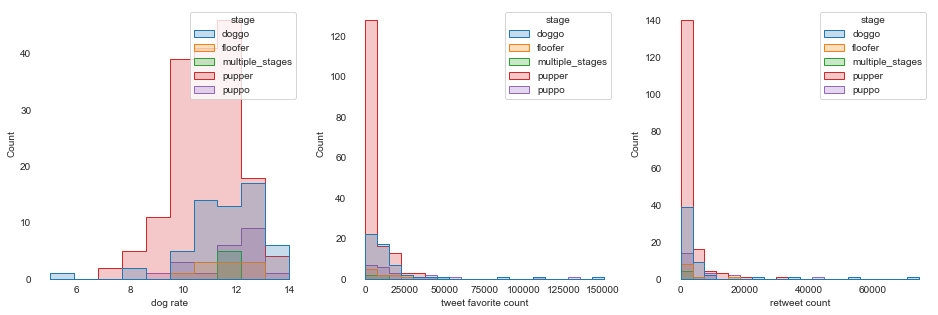

In [88]:
fig, axs = plt.subplots(ncols=3, figsize=(16,5))
sns.histplot(data=twitter_archive_master_df,bins=10, x='rating_base_10', hue='stage',element='step',ax=axs[0]);
sns.histplot(data=twitter_archive_master_df,bins=20, x='favorite_count', hue='stage',element='step',ax=axs[1]);
sns.histplot(data=twitter_archive_master_df,bins=20, x='retweet_count', hue='stage',element='step',ax=axs[2]);
axs[0].set(xlabel='dog rate');
axs[1].set(xlabel='tweet favorite count');
axs[2].set(xlabel='retweet count');
sns.despine(left=True, bottom=True)

Puppers are more common than puppos, doggos, and floofers combined. Puppers also had a lower rate and much lower popularity than puppos, doggos, floofers.

Regression

In [89]:
# create a new Data Frame for the regression
regression_df = twitter_archive_master_df[['timestamp','stage','rating_base_10','favorite_count','retweet_count']].copy()

# create dummies features for the categorical stage
regression_df = regression_df.join(pd.get_dummies(regression_df['stage']))
regression_df.drop(columns='stage', inplace=True)

regression_df.dropna(inplace=True)

regression_df.favorite_count = regression_df.favorite_count.astype(float)
regression_df.retweet_count = regression_df.retweet_count.astype(float)

# compute the number of the day since the first tweet
first_day = min(regression_df.timestamp)
first_day.replace(minute=0, hour=0, second=0, microsecond=0)
regression_df['elapsed_days'] = (regression_df.timestamp - first_day).dt.days

# add a intercept for the fitting
regression_df['intercept'] = 1

regression_df.head(3)

,timestamp,rating_base_10,favorite_count,retweet_count,doggo,floofer,multiple_stages,pupper,puppo,elapsed_days,intercept
1,2017-08-01 00:17:27+00:00,13.0,30347.0,5493.0,0,0,0,0,0,624,1
2,2017-07-31 00:18:03+00:00,12.0,22811.0,3631.0,0,0,0,0,0,623,1
4,2017-07-29 16:00:24+00:00,12.0,36588.0,8136.0,0,0,0,0,0,621,1


In [90]:
model = sm.OLS(regression_df['favorite_count'], regression_df[['intercept','elapsed_days','rating_base_10','pupper','puppo','doggo','multiple_stages','floofer']])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     140.7
Date:                Fri, 26 Feb 2021   Prob (F-statistic):          1.08e-160
Time:                        18:47:23   Log-Likelihood:                -16521.
No. Observations:                1563   AIC:                         3.306e+04
Df Residuals:                    1555   BIC:                         3.310e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept       -7976.8731   1724.279     -4.626      0.000   -1.14e+04   -4594.715
elapsed_days       34.1928      1.557     21.956      0.000      31.138      37.247
rating_base_10    822.6886    170.258      4.832      0.000     488.729    1156.648
pupper            546.9050    785.802      0.696      0.487    -994.438    2088.248
puppo            6162.8694   2097.049      2.939      0.003    2049.528    1.03e+04
doggo            3520.4090   1329.676      2.648      0.008     912.262    6128.556
multiple_stages  5215.9583   4238.190      1.231      0.219   -3097.213    1.35e+04
floofer          -791.7861   3003.407     -0.264      0.792   -6682.940    5099.368
==============================================================================
Omnibus:                     1925.352   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           287413.134
Skew:                           6.408   Prob(JB):                         0.00
Kurtosis:                      68.185   Cond. No.                     4.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
model = sm.OLS(regression_df['retweet_count'], regression_df[['intercept','elapsed_days','rating_base_10','pupper','puppo','doggo','multiple_stages','floofer']])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     47.23
Date:                Fri, 26 Feb 2021   Prob (F-statistic):           5.39e-61
Time:                        18:47:24   Log-Likelihood:                -15152.
No. Observations:                1563   AIC:                         3.032e+04
Df Residuals:                    1555   BIC:                         3.036e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept       -3507.4544    718.011     -4.885      0.000   -4915.827   -2099.082
elapsed_days        6.0852      0.648      9.384      0.000       4.813       7.357
rating_base_10    414.0891     70.898      5.841      0.000     275.024     553.154
pupper            224.3740    327.218      0.686      0.493    -417.460     866.208
puppo            2327.2304    873.237      2.665      0.008     614.384    4040.077
doggo            2507.7171    553.694      4.529      0.000    1421.652    3593.782
multiple_stages  2036.4135   1764.835      1.154      0.249   -1425.294    5498.121
floofer           385.2184   1250.656      0.308      0.758   -2067.931    2838.368
==============================================================================
Omnibus:                     2247.124   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           732806.566
Skew:                           8.255   Prob(JB):                         0.00
Kurtosis:                     107.784   Cond. No.                     4.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The number of elapsed days; the rate; the puppo and doggo stage appears to have a strong positive influence on the favourite count and the retweet count. The p-value for pupper, floofer and multiple_stages are very high. Therefore these features should not be considered.

<a id='conclusion'></a>
## Conclusion

All dogs are great!!!! 

The data is very dispersed. Despite of puppers natural cuteness they are not as much as popular as the puppos and doggos. One could speculate that this is becouse of these tweets are more common.

In [92]:
twitter_archive_master_df.to_csv('./data/twitter_archive_master.csv')